# Grade Regression Projet

- We need to predict the CGPA based on students various subjects grades.

In [1]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

import joblib    # for saving the model (just like pickle)

In [2]:
df=pd.read_csv('grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
df.shape

(571, 43)

In [5]:
# Removing Nominal data column

df = df.drop(columns = 'Seat No.')
df.shape

(571, 42)

## Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [7]:
df['PH-121'] = le.fit_transform(df['PH-121'])

In [8]:
df['HS-101'] = le.fit_transform(df['HS-101'])

In [9]:
df['CY-105'] = le.fit_transform(df['CY-105'])

In [10]:
df['HS-105/12'] = le.fit_transform(df['HS-105/12'])

In [11]:
df['MT-111'] = le.fit_transform(df['MT-111'])

In [12]:
df['CS-105'] = le.fit_transform(df['CS-105'])

In [13]:
df['CS-106'] = le.fit_transform(df['CS-106'])

In [14]:
df['EL-102'] = le.fit_transform(df['EL-102'])

In [15]:
df['EE-119'] = le.fit_transform(df['EE-119'])

In [16]:
df['ME-107'] = le.fit_transform(df['ME-107'])

In [17]:
df['CS-107'] = le.fit_transform(df['CS-107'])

In [18]:
df['HS-205/20'] = le.fit_transform(df['HS-205/20'])

In [19]:
df['MT-222'] = le.fit_transform(df['MT-222'])

In [20]:
df['EE-222'] = le.fit_transform(df['EE-222'])

In [21]:
df['MT-224'] = le.fit_transform(df['MT-224'])

In [22]:
df['CS-210'] = le.fit_transform(df['CS-210'])

In [23]:
df['CS-211'] = le.fit_transform(df['CS-211'])

In [24]:
df['CS-203'] = le.fit_transform(df['CS-203'])

In [25]:
df['CS-214'] = le.fit_transform(df['CS-214'])

In [26]:
df['EE-217'] = le.fit_transform(df['EE-217'])

In [27]:
df['CS-212'] = le.fit_transform(df['CS-212'])

In [28]:
df['CS-215'] = le.fit_transform(df['CS-215'])

In [29]:
df['MT-331'] = le.fit_transform(df['MT-331'])

In [30]:
df['EF-303'] = le.fit_transform(df['EF-303'])

In [31]:
df['HS-304'] = le.fit_transform(df['HS-304'])

In [32]:
df['CS-301'] = le.fit_transform(df['CS-301'])

In [33]:
df['CS-302'] = le.fit_transform(df['CS-302'])

In [34]:
df['TC-383'] = le.fit_transform(df['TC-383'])

In [35]:
df['MT-442'] = le.fit_transform(df['MT-442'])

In [36]:
df['EL-332'] = le.fit_transform(df['EL-332'])

In [37]:
df['CS-318'] = le.fit_transform(df['CS-318'])

In [38]:
df['CS-306'] = le.fit_transform(df['CS-306'])

In [39]:
df['CS-312'] = le.fit_transform(df['CS-312'])

In [40]:
df['CS-317'] = le.fit_transform(df['CS-317'])

In [41]:
df['CS-403'] = le.fit_transform(df['CS-403'])

In [42]:
df['CS-421'] = le.fit_transform(df['CS-421'])

In [43]:
df['CS-406'] = le.fit_transform(df['CS-406'])

In [44]:
df['CS-414'] = le.fit_transform(df['CS-414'])

In [45]:
df['CS-419'] = le.fit_transform(df['CS-419'])

In [46]:
df['CS-423'] = le.fit_transform(df['CS-423'])

In [47]:
df['CS-412'] = le.fit_transform(df['CS-412'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int32  
 1   HS-101     571 non-null    int32  
 2   CY-105     571 non-null    int32  
 3   HS-105/12  571 non-null    int32  
 4   MT-111     571 non-null    int32  
 5   CS-105     571 non-null    int32  
 6   CS-106     571 non-null    int32  
 7   EL-102     571 non-null    int32  
 8   EE-119     571 non-null    int32  
 9   ME-107     571 non-null    int32  
 10  CS-107     571 non-null    int32  
 11  HS-205/20  571 non-null    int32  
 12  MT-222     571 non-null    int32  
 13  EE-222     571 non-null    int32  
 14  MT-224     571 non-null    int32  
 15  CS-210     571 non-null    int32  
 16  CS-211     571 non-null    int32  
 17  CS-203     571 non-null    int32  
 18  CS-214     571 non-null    int32  
 19  EE-217     571 non-null    int32  
 20  CS-212    

In [49]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,4.817863,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,3.179170,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [50]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

# Distribution

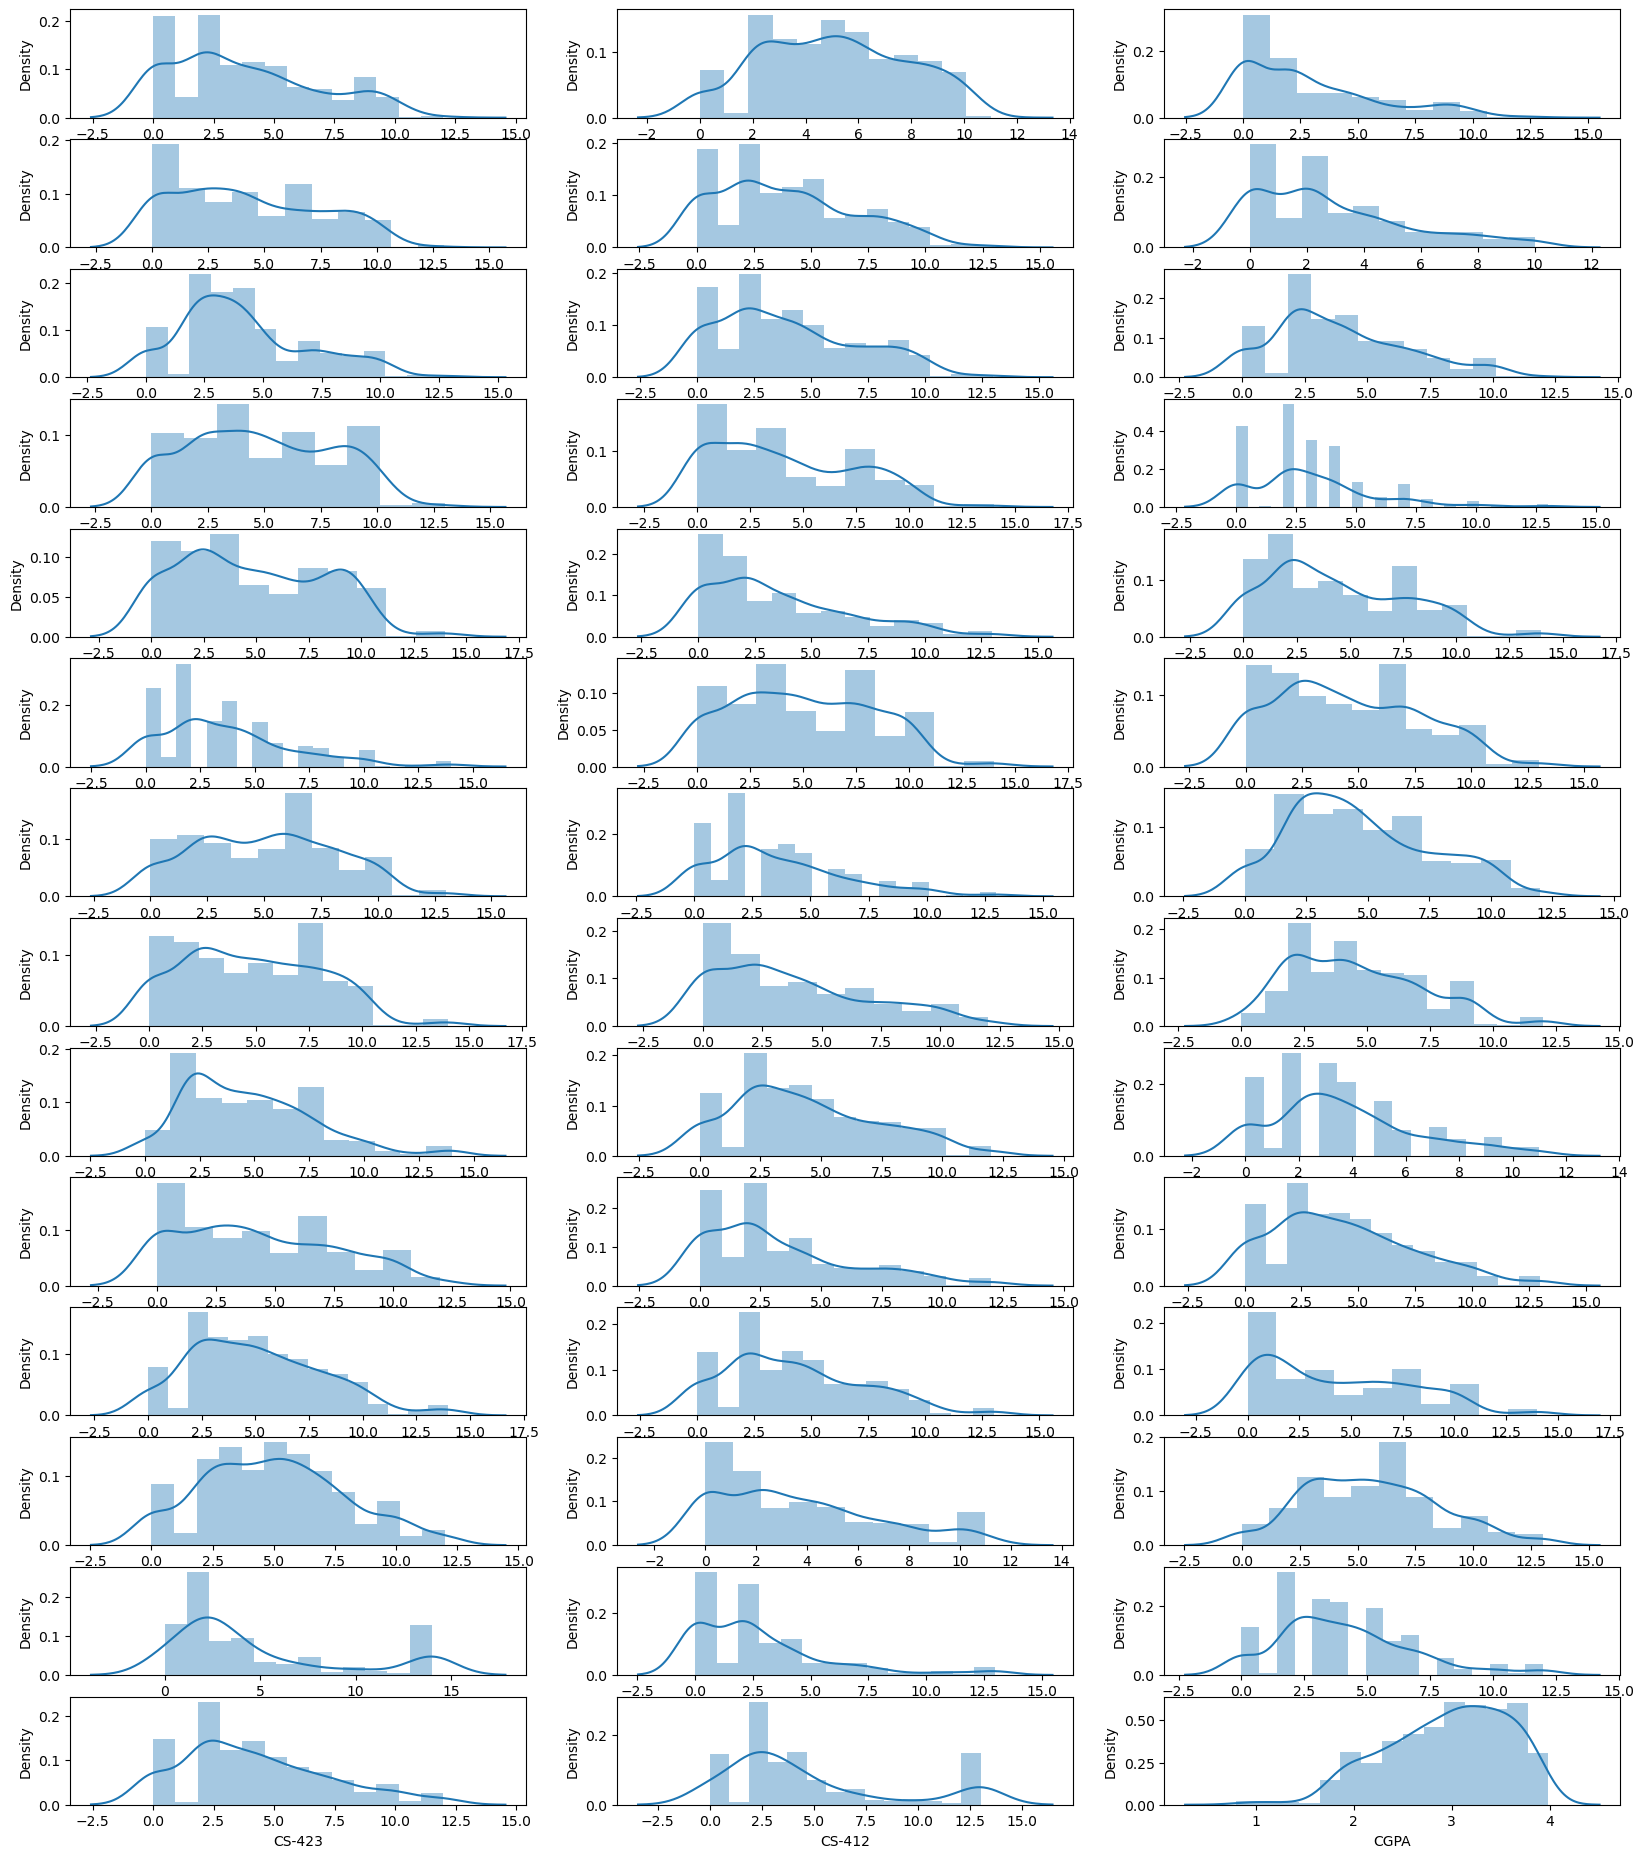

In [51]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=45:
        plt.subplot(15,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

All are almost normally distributed

### Relationship - Feature v/s Label

In [52]:
df_features = df.drop('CGPA',axis=1)

In [53]:
df_features.corrwith(df.CGPA)

PH-121      -0.663135
HS-101      -0.537170
CY-105      -0.670190
HS-105/12   -0.627644
MT-111      -0.756109
CS-105      -0.613169
CS-106      -0.563178
EL-102      -0.669536
EE-119      -0.668787
ME-107      -0.677342
CS-107      -0.650531
HS-205/20   -0.500668
MT-222      -0.695418
EE-222      -0.644384
MT-224      -0.743577
CS-210      -0.798841
CS-211      -0.669814
CS-203      -0.682817
CS-214      -0.758407
EE-217      -0.703131
CS-212      -0.686163
CS-215      -0.768707
MT-331      -0.610787
EF-303      -0.589066
HS-304      -0.656729
CS-301      -0.747775
CS-302      -0.770868
TC-383      -0.682447
MT-442      -0.656557
EL-332      -0.803475
CS-318      -0.660106
CS-306      -0.783624
CS-312      -0.562341
CS-317      -0.800771
CS-403      -0.657128
CS-421      -0.742041
CS-406      -0.280626
CS-414      -0.512836
CS-419      -0.732899
CS-423      -0.624558
CS-412      -0.470128
dtype: float64

### Feature v/s Feature

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
x = df.drop(columns=['CGPA'])
y = df['CGPA']

In [56]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [57]:
vif=pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns'] = x.columns

print(vif)

         vif    Columns
0   3.118170     PH-121
1   1.801388     HS-101
2   2.639742     CY-105
3   2.321414  HS-105/12
4   2.733851     MT-111
5   2.463277     CS-105
6   2.058487     CS-106
7   2.194235     EL-102
8   2.165581     EE-119
9   2.396211     ME-107
10  2.549114     CS-107
11  1.869001  HS-205/20
12  2.494605     MT-222
13  2.729973     EE-222
14  3.175355     MT-224
15  3.820836     CS-210
16  2.850482     CS-211
17  2.786941     CS-203
18  2.976334     CS-214
19  2.819329     EE-217
20  3.124710     CS-212
21  3.329523     CS-215
22  2.252004     MT-331
23  2.427121     EF-303
24  3.115814     HS-304
25  3.491133     CS-301
26  3.174812     CS-302
27  3.277278     TC-383
28  2.302720     MT-442
29  3.716069     EL-332
30  2.758318     CS-318
31  3.958885     CS-306
32  3.609461     CS-312
33  3.571131     CS-317
34  2.875990     CS-403
35  3.159277     CS-421
36  1.913361     CS-406
37  2.755351     CS-414
38  3.236744     CS-419
39  3.147072     CS-423
40  2.356333    

No multicollinearity found. We can take all.

### Train-test-split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

### Model Training

In [59]:
lm = LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.score(x_test,y_test)

0.8937545260336568

In [61]:
# We can't use hyper-parameter tuning on LinearRegression as parameters are specific here.

In [62]:
# Saving the model

joblib.dump(lm, 'GradesRegressionModel.pkl')

['GradesRegressionModel.pkl']

In [63]:
# To load model

loaded_model = joblib.load('GradesRegressionModel.pkl')